#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Anime-Planet')

In [3]:
data.head()

,Unnamed: 0,id,name,rating,description,tags,image_url
0,0,1048,Death Note,4.3,Have you ever felt like the world would be a b...,"Mystery, Shounen, Contemporary Fantasy, Crime,...",https://cdn.anime-planet.com/anime/primary/dea...
1,1,5323,Attack on Titan,4.4,"Over a century ago, mankind was devoured by gi...","Action, Fantasy, Horror, Shounen, Dark Fantasy...",https://cdn.anime-planet.com/anime/primary/att...
2,2,22,Naruto,4.0,Naruto Uzumaki is a young ninja who bears a gr...,"Action, Drama, Shounen, Japanese Mythology, Ni...",https://cdn.anime-planet.com/anime/primary/nar...
3,3,93,Spirited Away,4.4,Chihiro and her family are on their way to the...,"Adventure, Fantasy, Child Protagonists, Curse,...",https://cdn.anime-planet.com/anime/primary/spi...
4,4,4472,Sword Art Online,4.0,"The year is 2022, and gamers have lined up on ...","Action, Adventure, Fantasy, Sci Fi, Dungeon, G...",https://cdn.anime-planet.com/anime/primary/swo...


In [4]:
data.drop(data.columns[0], axis=1, inplace=True)

data.head()

,id,name,rating,description,tags,image_url
0,1048,Death Note,4.3,Have you ever felt like the world would be a b...,"Mystery, Shounen, Contemporary Fantasy, Crime,...",https://cdn.anime-planet.com/anime/primary/dea...
1,5323,Attack on Titan,4.4,"Over a century ago, mankind was devoured by gi...","Action, Fantasy, Horror, Shounen, Dark Fantasy...",https://cdn.anime-planet.com/anime/primary/att...
2,22,Naruto,4.0,Naruto Uzumaki is a young ninja who bears a gr...,"Action, Drama, Shounen, Japanese Mythology, Ni...",https://cdn.anime-planet.com/anime/primary/nar...
3,93,Spirited Away,4.4,Chihiro and her family are on their way to the...,"Adventure, Fantasy, Child Protagonists, Curse,...",https://cdn.anime-planet.com/anime/primary/spi...
4,4472,Sword Art Online,4.0,"The year is 2022, and gamers have lined up on ...","Action, Adventure, Fantasy, Sci Fi, Dungeon, G...",https://cdn.anime-planet.com/anime/primary/swo...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23315 non-null  int64  
 1   name         23315 non-null  object 
 2   rating       17948 non-null  float64
 3   description  23304 non-null  object 
 4   tags         22776 non-null  object 
 5   image_url    23315 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [6]:
data.describe()

,id,rating
count,23315.000000,17948.000000
mean,12170.901866,3.364419
std,6988.364007,0.390804
min,2.000000,1.000000
25%,6118.500000,3.100000
50%,12225.000000,3.400000
75%,18204.500000,3.600000
max,24314.000000,4.600000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23315 non-null  int64  
 1   name         23315 non-null  object 
 2   rating       17948 non-null  float64
 3   description  23304 non-null  object 
 4   tags         22776 non-null  object 
 5   image_url    23315 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


## 

#### Data Preparation
##### Its a very big data soo taking only Popular mid to good animes

In [8]:
data = data[data['rating']>=3.5]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7108 entries, 0 to 23313
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7108 non-null   int64  
 1   name         7108 non-null   object 
 2   rating       7108 non-null   float64
 3   description  7107 non-null   object 
 4   tags         6970 non-null   object 
 5   image_url    7108 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 388.7+ KB


In [9]:
data.isnull().sum()

id               0
name             0
rating           0
description      1
tags           138
image_url        0
dtype: int64

##### Handling Null Values

In [10]:
# Assuming your DataFrame is named df
data.dropna(subset=['description','tags'], inplace=True)

In [11]:
data.isnull().sum()

id             0
name           0
rating         0
description    0
tags           0
image_url      0
dtype: int64

### 

### EDA (Exploratory Data Analysis)

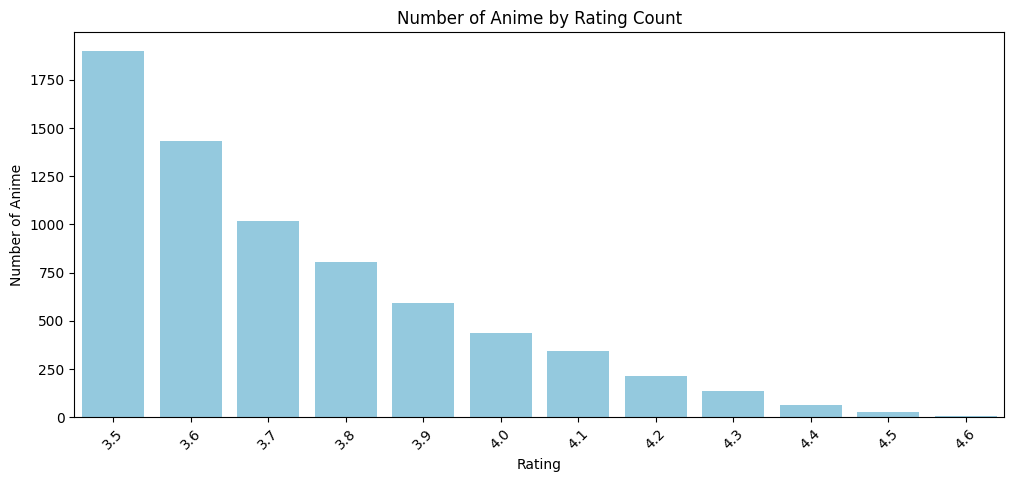

In [12]:
# Grouping data by the count of ratings and calculating the number of anime for each rating count
rating_counts = data['rating'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(12, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='skyblue')
plt.title('Number of Anime by Rating Count')
plt.xlabel('Rating')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.show()

- Majority of Anime rating belongs between 3.2 to 3.5 every range has more than 15000 animes says most number of anime's are mid
- While Some decent number of anime are rated good those are rated 3.5+ and there are very less number of anime which are actually great those are above 4+ rating
- Possibel Reason - Most number of anime which are made their animation quality is not good due to which people dont like it despite of which good story 
on the other hand there are few but quality anime which has good animation in it making it the first hand userchoice to watch

## 

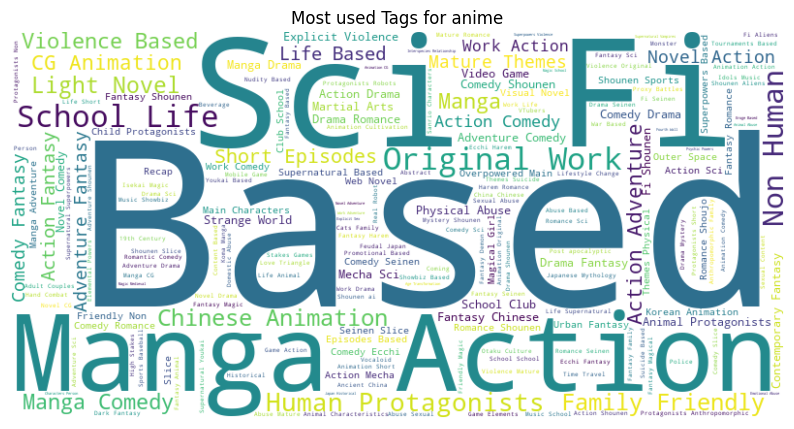

In [13]:
from wordcloud import WordCloud

tags_text = ' '.join(data['tags'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(tags_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used Tags for anime')
plt.axis('off')
plt.show()

- The Anime tags helps us to understand what kind of genre it belongs above you can see they mostly used tags are Sci Fi, Human Protogonists, Based, Non Muman etc words which also helps us to understand the plot from these animes

#### Data Selection for ML work

In [14]:
Anime = data[['id','name','description','tags','image_url']]

In [15]:
Anime.head()

,id,name,description,tags,image_url
0,1048,Death Note,Have you ever felt like the world would be a b...,"Mystery, Shounen, Contemporary Fantasy, Crime,...",https://cdn.anime-planet.com/anime/primary/dea...
1,5323,Attack on Titan,"Over a century ago, mankind was devoured by gi...","Action, Fantasy, Horror, Shounen, Dark Fantasy...",https://cdn.anime-planet.com/anime/primary/att...
2,22,Naruto,Naruto Uzumaki is a young ninja who bears a gr...,"Action, Drama, Shounen, Japanese Mythology, Ni...",https://cdn.anime-planet.com/anime/primary/nar...
3,93,Spirited Away,Chihiro and her family are on their way to the...,"Adventure, Fantasy, Child Protagonists, Curse,...",https://cdn.anime-planet.com/anime/primary/spi...
4,4472,Sword Art Online,"The year is 2022, and gamers have lined up on ...","Action, Adventure, Fantasy, Sci Fi, Dungeon, G...",https://cdn.anime-planet.com/anime/primary/swo...


In [16]:
Anime.loc[:, 'Content'] =  Anime['description']  + ' ' + Anime['tags'] 

In [17]:
Anime.head()

,id,name,description,tags,image_url,Content
0,1048,Death Note,Have you ever felt like the world would be a b...,"Mystery, Shounen, Contemporary Fantasy, Crime,...",https://cdn.anime-planet.com/anime/primary/dea...,Have you ever felt like the world would be a b...
1,5323,Attack on Titan,"Over a century ago, mankind was devoured by gi...","Action, Fantasy, Horror, Shounen, Dark Fantasy...",https://cdn.anime-planet.com/anime/primary/att...,"Over a century ago, mankind was devoured by gi..."
2,22,Naruto,Naruto Uzumaki is a young ninja who bears a gr...,"Action, Drama, Shounen, Japanese Mythology, Ni...",https://cdn.anime-planet.com/anime/primary/nar...,Naruto Uzumaki is a young ninja who bears a gr...
3,93,Spirited Away,Chihiro and her family are on their way to the...,"Adventure, Fantasy, Child Protagonists, Curse,...",https://cdn.anime-planet.com/anime/primary/spi...,Chihiro and her family are on their way to the...
4,4472,Sword Art Online,"The year is 2022, and gamers have lined up on ...","Action, Adventure, Fantasy, Sci Fi, Dungeon, G...",https://cdn.anime-planet.com/anime/primary/swo...,"The year is 2022, and gamers have lined up on ..."


In [18]:
Anime  = Anime.drop(columns=['description', 'tags', 'id'])

In [19]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6969 entries, 0 to 23313
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       6969 non-null   object
 1   image_url  6969 non-null   object
 2   Content    6969 non-null   object
dtypes: object(3)
memory usage: 217.8+ KB


In [20]:
Anime.reset_index(drop = True, inplace=True)

Anime.head()

,name,image_url,Content
0,Death Note,https://cdn.anime-planet.com/anime/primary/dea...,Have you ever felt like the world would be a b...
1,Attack on Titan,https://cdn.anime-planet.com/anime/primary/att...,"Over a century ago, mankind was devoured by gi..."
2,Naruto,https://cdn.anime-planet.com/anime/primary/nar...,Naruto Uzumaki is a young ninja who bears a gr...
3,Spirited Away,https://cdn.anime-planet.com/anime/primary/spi...,Chihiro and her family are on their way to the...
4,Sword Art Online,https://cdn.anime-planet.com/anime/primary/swo...,"The year is 2022, and gamers have lined up on ..."


### Text Preprocessing

In [21]:
Anime['Content'][1]

"Over a century ago, mankind was devoured by giant beings of unknown intelligence and origin known as Titans – creatures that eat humans alive indiscriminately and for no apparent reason. The remaining population has managed to survive the last hundred years only by building a multi-walled city capable of keeping the Titans at bay, training military recruits to patrol the perimeter and gather intelligence about their mysterious foe. Eren and Mikasa have lived a relatively peaceful life behind the city's walls, but when a massive Titan appears, smashing the outer barrier and unleashing a wave of terror, their lives are brutally changed forever... Action, Fantasy, Horror, Shounen, Dark Fantasy, Death of a Loved One, Isolated Society, Military, Outside World, Overpowered Main Characters, Post-apocalyptic, Revenge, Cannibalism, Explicit Violence, Mature Themes, Suicide, Based on a Manga"

In [22]:
import re
from nltk.stem import WordNetLemmatizer

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean text in the 'Description_Genre' column
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Split text into words
    words = text.split()
    # Lemmatize each word
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a single string
    cleaned_text = " ".join(words)
    return cleaned_text

Anime['Content'] = Anime['Content'].apply(clean_text)

In [23]:
Anime['Content'][1]

'over a century ago mankind wa devoured by giant being of unknown intelligence and origin known a titan creature that eat human alive indiscriminately and for no apparent reason the remaining population ha managed to survive the last hundred year only by building a multi walled city capable of keeping the titan at bay training military recruit to patrol the perimeter and gather intelligence about their mysterious foe eren and mikasa have lived a relatively peaceful life behind the city s wall but when a massive titan appears smashing the outer barrier and unleashing a wave of terror their life are brutally changed forever action fantasy horror shounen dark fantasy death of a loved one isolated society military outside world overpowered main character post apocalyptic revenge cannibalism explicit violence mature theme suicide based on a manga'

In [24]:
Anime.head()

,name,image_url,Content
0,Death Note,https://cdn.anime-planet.com/anime/primary/dea...,have you ever felt like the world would be a b...
1,Attack on Titan,https://cdn.anime-planet.com/anime/primary/att...,over a century ago mankind wa devoured by gian...
2,Naruto,https://cdn.anime-planet.com/anime/primary/nar...,naruto uzumaki is a young ninja who bear a gre...
3,Spirited Away,https://cdn.anime-planet.com/anime/primary/spi...,chihiro and her family are on their way to the...
4,Sword Art Online,https://cdn.anime-planet.com/anime/primary/swo...,the year is 2022 and gamers have lined up on l...


In [25]:
Anime.to_csv('Anime_Data')

In [26]:
Anime.drop(['image_url'], axis=1, inplace=True)
Anime.head()


,name,Content
0,Death Note,have you ever felt like the world would be a b...
1,Attack on Titan,over a century ago mankind wa devoured by gian...
2,Naruto,naruto uzumaki is a young ninja who bear a gre...
3,Spirited Away,chihiro and her family are on their way to the...
4,Sword Art Online,the year is 2022 and gamers have lined up on l...


## 

### Vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features= 5000, stop_words='english')

# Fit and transform the description column to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(Anime['Content'])

# Computing cosine similarity matrix
similarity = linear_kernel(tfidf_matrix)

## 

#### Visualizatizing words of Content column based on top TF-IDF scores

C:\Users\meetp\AppData\Local\Temp\ipykernel_21104\2101860216.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_scores, y=top_words, palette='viridis')


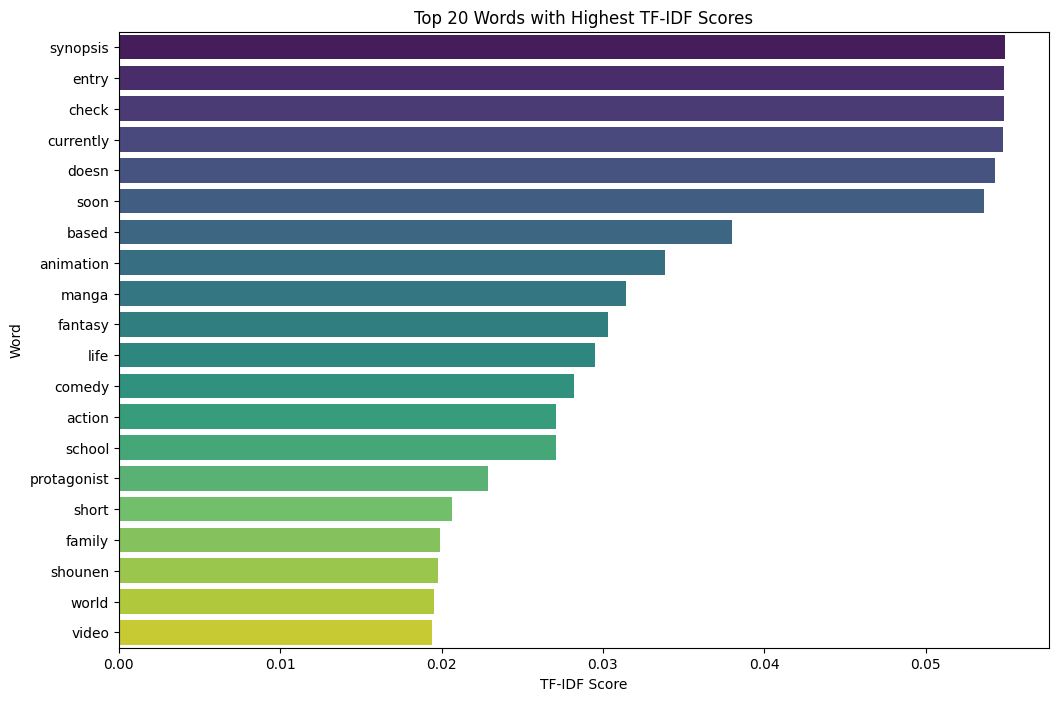

In [28]:
# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF scores for each word
tfidf_scores = tfidf_matrix.mean(axis=0)

# Create a dictionary of words and their corresponding TF-IDF scores
word_tfidf = dict(zip(feature_names, tfidf_scores.tolist()[0]))

# Sort the dictionary by TF-IDF scores in descending order
sorted_word_tfidf = dict(sorted(word_tfidf.items(), key=lambda item: item[1], reverse=True))

# Visualize top N words with highest TF-IDF scores
top_n = 20  # You can adjust the number of top words as needed
top_words = list(sorted_word_tfidf.keys())[:top_n]
top_tfidf_scores = list(sorted_word_tfidf.values())[:top_n]

# Plot the top N words with their TF-IDF scores
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tfidf_scores, y=top_words, palette='viridis')
plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

## 

### Recommnedation System using cosine similarity

In [29]:
Anime[Anime['name']=="My Hero Academia"].index[0]

5

In [30]:
distance = sorted(list(enumerate(similarity[5])), reverse=True, key=lambda vector:vector[1])
for i in distance[1:11]:
    anime_index = i[0]
    print(Anime.iloc[anime_index]['name'])

My Hero Academia 2
Tiger & Bunny 2
My Hero Academia Movie 2: Heroes:Rising
My Hero Academia: Hero Notebook
Tiger & Bunny the Movie: The Beginning
My Hero Academia Movie 2: Heroes:Rising - Picture Drama
One-Punch Man 2
To Be Hero X PV
Cautious Hero: The Hero Is Overpowered but Overly Cautious
Youkai Watch Movie 6: Youkai Gakuen Y - Neko wa Hero ni Nareru ka


In [31]:
from sklearn.neighbors import NearestNeighbors

# Initialize Nearest Neighbors model
model = NearestNeighbors(n_neighbors=11, metric='cosine')

# Fit the model
model.fit(tfidf_matrix)

def recommend(anime_name):
    index = Anime[Anime['name']==anime_name].index[0]
    distances, indices = model.kneighbors(tfidf_matrix[index])
    for idx in indices.flatten()[1:]:
        print(Anime.iloc[idx]['name'])

In [32]:
recommend("Death Note")

Death Note Rewrite 2: L's Successors
Death Note Rewrite 1: Visions of a God
Angels of Death (Web)
Angels of Death
The Garden of Sinners Remix: Gate of Seventh Heaven
Strike the Blood Final
ID:INVADED
Overlord III: Play Play Pleiades
Strike the Blood IV
In Another World With My Smartphone


### 

### Pickling the Models

In [33]:
import pickle

pickle.dump(model, open('similarity.pkl', 'wb'))